# 읽어주세요 !

> 만약 결측값을 어떻게 다룰지 정도만 알고 싶으시다면 위 링크를 참조하여 방문해주세요! https://www.kaggle.com/pythonash/making-completed-dataset.


타이타닉 생존자 예측 대회에서 Top 6%에 랭크된 노트북 입니다.

이 노트북은 결측값을 어떻게 다룰지도 포함되어 있습니다.

또한, 적은 데이터셋에서 딥러닝을 어떻게 적용할지도 포함되어 있습니다.

하지만 적은 데이터 셋에는 딥러닝 보다는 머신러닝이 더 어울릴지도 모르죠.

그래도 제 노트북과 함께라면 딥러닝으로도 77%가 넘는 정확도를 달성하실 수 있습니다.

위 노트북은 분류 문제를 해결함에 있어서 초심자들을 위한 노트북 입니다.

그래서 EDA는 많지 않습니다. 관련한 EDA 노트북은 이미 다른 유저들이 많이 배포해 놨으니 그것들도 참고하시면 도움이 될 겁니다.

그럼 저와 결측값을 어떻게 다루고, 이들로 하여금 어떻게 딥러닝을 다룰지 시작해봐요!

# pandas 라이브러리 불러오기

데이터셋을 다루기 위한 라이브러리를 불러옵니다.

## 먼저 데이터셋들을 살펴보겠습니다.

In [ ]:
import pandas as pd
df=pd.read_csv('../input/titanic/train.csv')
df1=pd.read_csv('../input/titanic/test.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 위 셀에는 훈련용, 아래 셀에는 테스트용 데이터셋이 있습니다.

In [ ]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 훈련 데이터셋에 있는 결측값 갯수

아래 코드를 입력하면 각 피쳐(특성)에 해당하는 결측값 개수를 알 수 있는데, Age, Cabin, Embarked 등에 결측값이 있네요.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 테스트 데이터셋에 포함된 결측값 개수

여기에서는 Age, Fare, Cabin에 결측값이 있군요.

In [ ]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 데이터셋에서 규칙 찾아보기, 이름에는 어떤게 있을까?

> 일단 James라는 이름이 많아 보이네요.

그러면 이 Name이라는 컬럼을 최대한 다듬어서 변수로 사용해볼 수는 없을까요?

In [ ]:
for n in df['Name']:
  if n[-5:] == 'James':
    print(n)

Moran, Mr. James
Crease, Mr. Ernest James
Bateman, Rev. Robert James
Flynn, Mr. James
Scanlan, Mr. James
Webber, Mr. James
Farrell, Mr. James
Downton, Mr. William James
Elsbury, Mr. William James
Kelly, Mr. James
Hawksford, Mr. Walter James
Lester, Mr. James
Slemen, Mr. Richard James
Banfield, Mr. Frederick James


In [ ]:
for n in df1['Name']:
  if n[-5:] == 'James':
    print(n)

Kelly, Mr. James
Beauchamp, Mr. Henry James
Borebank, Mr. John James
Veal, Mr. James
Everett, Mr. Thomas James
Ware, Mr. John James


## 먼저 Name을 이름과 성으로 분리해보겠습니다.

In [ ]:
first_name=pd.DataFrame()
last_name=pd.DataFrame()

for a in df['Name']:
  b,c = a.split(',')
  first_name=first_name.append([b])
  last_name=last_name.append([c])

## 분리된 이름

In [ ]:
first_name

,0
0,Braund
0,Cumings
0,Heikkinen
0,Futrelle
0,Allen
...,...
0,Montvila
0,Graham
0,Johnston
0,Behr


## 분리된 성

In [ ]:
last_name

,0
0,Mr. Owen Harris
0,Mrs. John Bradley (Florence Briggs Thayer)
0,Miss. Laina
0,Mrs. Jacques Heath (Lily May Peel)
0,Mr. William Henry
...,...
0,Rev. Juozas
0,Miss. Margaret Edith
0,"Miss. Catherine Helen ""Carrie"""
0,Mr. Karl Howell


## 그러면 이제 테스트 데이터셋에도 똑같이 적용해볼게요.

In [ ]:
first_name1=pd.DataFrame()
last_name1=pd.DataFrame()

for a in df1['Name']:
  b,c = a.split(',')
  first_name1=first_name1.append([b])
  last_name1=last_name1.append([c])

In [ ]:
first_name1

,0
0,Kelly
0,Wilkes
0,Myles
0,Wirz
0,Hirvonen
...,...
0,Spector
0,Oliva y Ocana
0,Saether
0,Ware


In [ ]:
last_name1

,0
0,Mr. James
0,Mrs. James (Ellen Needs)
0,Mr. Thomas Francis
0,Mr. Albert
0,Mrs. Alexander (Helga E Lindqvist)
...,...
0,Mr. Woolf
0,Dona. Fermina
0,Mr. Simon Sivertsen
0,Mr. Frederick


## 훈련 데이터셋과 테스트 데이터셋 사이의 관계 찾아보기

테스트 데이터셋에 있는 이름이나 성이 훈련 데이터셋에도 있는지 찾아보기!

이 작업을 하는 이유는 생존율 측면에서, 가족이라면 살아있거나 아니거나의 확률분포가 닮아있을 확률이 높다고 생각하기 때문입니다.

다시 말해서, 훈련 데이터셋에서 Kim이라는 성을 가진 가족이 전부 살아 있는걸 알게 되었다면 테스트 데이터셋에서 Kim이라는 성을 가진 사람도 살아있을 확률을 높게 추론해볼 수 있다는 것이죠.

물론 이 과정역시 저희는 숫자를 통해 딥러닝 모델에 알려줄 뿐이지만, 조그마한 단서라도 발굴해 내기 위함 입니다.

> first_name1 - 테스트 데이터셋의 이름

> first_name = 훈련 데이터셋의 이름

> last_name1 = 테스트 데이터셋의 성

> last_name = 훈련 데이터셋의 성

테스트 데이터셋에 있는 이름이 훈련 데이터셋에도 있는지 찾아보기

In [ ]:
for aa in first_name1[0].unique():
  if (aa in first_name[0].unique()) == True:
    print(aa)

Kelly
Hirvonen
Svensson
Connolly
Caldwell
Davies
Chaffee
del Carlo
Keane
Ilmakangas
Rothschild
Olsen
Williams
Ryerson
Robins
Ostby
Samaan
Louch
Dean
Johnston
Cacic
Karun
Goldsmith
Kimball
Coutts
Smith
Hocking
Fortune
Rice
Cor
Davison
Bradley
Burns
Moore
Boulos
Wells
Davidson
Cavendish
Weisz
Thomas
Ryan
Chronopoulos
Sandstrom
Chapman
Watt
Kiernan
Cribb
McCoy
Lefebre
Carlsson
Goodwin
Vander Planke
Lahtinen
Klasen
Asplund
Touma
Wright
Kink-Heilmann
Ford
Brown
Becker
Compton
Marvin
Douglas
Phillips
Sage
Angle
van Billiard
Drew
Karlsson
Spedden
Nilsson
Murphy
Danbom
Astor
Quick
Andrew
McGowan
Andersson
Wick
Widener
Duran y More
Cook
Moubarek
Wiklund
Cumings
Warren
Christy
Kenyon
Hold
West
de Messemaeker
Fox
Lennon
Bryhl
Faunthorpe
Oreskovic
Fleming
Rosblom
Dennis
Daly
Dodge
Laroche
Johansson
Olsson
McCarthy
Crosby
Allison
Aks
Hays
Hansen
Carr
White
Spencer
Rogers
Jonsson
Clarke
Nakid
Elias
Betros
Cardeza
Giles
Greenfield
Herman
Lindell
Mallet
Harder
Caram
Bowen
Kink
O'Connor
Risien
McNamee


테스트 데이터셋에 있는 이름이 훈련 데이터셋에 없는 목록 찾아보기

In [ ]:
for aa in first_name1[0].unique():
  if (aa in first_name[0].unique()) == False:
    print(aa)

Wilkes
Myles
Wirz
Abrahim
Ilieff
Jones
Snyder
Howard
Assaf
Assaf Khalil
Flegenheim
Daher
Brady
Jefferys
Mock
Katavelas
Roth
Sap
Hee
Franklin
Corbett
Peltomaki
Chevre
Shaughnessy
Bucknell
Pulbaum
Mangiavacchi
Abelseth
Chaudanson
Dika
McCrae
Bjorklund
Corey
Tucker
Mulvihill
Minkoff
Nieminen
Ovies y Rodriguez
Geiger
Keeping
Miles
Cornell
Aldworth
Doyle
Straus
Case
Demetri
Lamb
Khalil
Barry
Badman
O'Donoghue
Dyker
Pedersen
Guest
Birnbaum
Tenglin
Makinen
Braf
Nancarrow
Stengel
Foley
Johansson Palmquist
Holthen
Buckley
Willer
Swane
Stanton
Shine
Evans
Beattie
Schabert
Carver
Kennedy
Brobeck
Bowenur
Petersen
Spinner
Gracie
Dintcheff
Zakarian
Schmidt
Drapkin
Daniels
Beauchamp
Lindeberg-Lind
Hilliard
Crafton
Earnshaw
Matinoff
Storey
Duquemin
Bird
Lundin
Borebank
Peacock
Smyth
Pearce
Peruschitz
Brandeis
Cassebeer
Hellstrom
Lithman
Torfa
Sincock
McCrie
Lane
Maybery
Veal
Salomon
Lingane
Baimbrigge
Rasmussen
Omont
Collett
Rosenbaum
Delalic
Andersen
Finoli
Deacon
Head
Mahon
Thomson
Reynolds
Candee
M

테스트 데이터셋에 있는 성이 훈련 데이터셋에도 있는지 찾아보기

In [ ]:
for aa in last_name1[0].unique():
  if (aa in last_name[0].unique()) == True:
    print(aa)

 Mr. James
 Mr. Albert
 Miss. Kate
 Mr. Benjamin
 Mr. Daniel
 Mr. Martin
 Mr. Charles Alexander
 Mr. Patrick
 Mr. Frank
 Miss. Elizabeth
 Mr. Robert
 Mr. Jakob
 Mr. William Henry
 Mr. William
 Mr. Edward
 Mr. George
 Miss. Ellen Natalia
 Mr. John
 Mr. August
 Mr. Thomas
 Mr. Joseph
 Miss. Ellen
 Mr. Emil
 Mr. Simon
 Miss. Bridget
 Mr. Karl Johan
 Mr. Michael
 Mr. Samuel
 Miss. Mary
 Mr. Harry
 Mr. Sarkis
 Mr. Arthur
 Mr. Minko
 Mr. Hanna
 Mr. David
 Miss. Jeannie
 Mr. Ali
 Mr. Tannous
 Mr. Ivan
 Mr. Joseph Charles
 Mr. Frederick


테스트 데이터셋에 있는 성이 훈련 데이터셋에 없는 목록 찾아보기

In [ ]:
for aa in last_name1[0].unique():
  if (aa in last_name[0].unique()) == False:
    print(aa)

 Mrs. James (Ellen Needs)
 Mr. Thomas Francis
 Mrs. Alexander (Helga E Lindqvist)
 Mr. Johan Cervin
 Mr. Albert Francis
 Mrs. Joseph (Sophie Halaut Easu)
 Mr. John Samuel
 Mr. Ylio
 Mr. Charles Cresson
 Mrs. John Pillsbury (Nelle Stevenson)
 Mrs. Herbert Fuller (Carrie Constance Toogood)
 Mrs. Sebastiano (Argenia Genovesi)
 Mr. Gerios
 Miss. Ida Livija
 Mrs. Mariana (Miriam")"
 Master. Artur Karl
 Mrs. Alfred (Antoinette)
 Mr. Richard Norris II
 Mrs. Arthur Larned (Emily Maria Borie)
 Mr. Alexander A
 Miss. Helene Ragnhild
 Mr. Shedid
 Mr. John Bertram
 Mr. Elias
 Mr. Clifford Thomas
 Mrs. Bertram (Eva Georgetta Light)
 Mrs. Andrew G (Elizabeth Lily" Watson)"
 Mr. Philipp Edmund
 Mr. Vassilios (Catavelas Vassilios")"
 Miss. Sarah A
 Miss. Manda
 Mr. Julius
 Mr. Ling
 Mr. Franz
 Mr. Thomas Parham
 Mr. Nathan
 Mrs. Walter H (Irene Colvin)
 Mrs. Edwin Nelson Jr (Gertrude Parsons)
 Mr. Nikolai Johannes
 Mr. Paul Romaine
 Mrs. William Robert (Emma Eliza Ward)
 Mrs. William (Winnie Minnie" T

## 호칭을 단서로 생각해보는건 어떨까요?

이 데이터셋에서 Name 데이터의 경우에는 많은 성씨들이 있습니다. 그래서 이것들을 가지고 단서를 찾는건 쉬운게 아니죠

하지만, 앞에 Mr., Miss 등과 같은 호칭이 있는 걸 보실 수 있습니다. 이건 찾기 쉽죠.

그래서 일관된 단서를 뽑아내기 위해서 Name에 있는 호칭들을 숫자로 코딩하고 이를 단서로 이용하겠습니다.

아래 코드는 성씨가 있는 데이터를 다시 호칭과 성씨로 나누는 작업입니다.

In [ ]:
last=pd.DataFrame()
name=pd.DataFrame()

last1=pd.DataFrame()
name1=pd.DataFrame()

for i in last_name[0]:
  l,n = i.split('.',maxsplit=1)
  last=last.append([l])
  name=name.append([n])

for i in last_name1[0]:
  l,n = i.split('.',maxsplit=1)
  last1=last1.append([l])
  name1=name1.append([n])

## 테스트 데이터셋에 있는 호칭이 훈련 데이터셋에도 있는지 확인해보기

Mr, Mrs, Miss, Master, Ms, Col, Rev, and Dr are in train and test.

In [ ]:
for aa in last1[0].unique():
  if (aa in last[0].unique()) == True:
    print(aa)

 Mr
 Mrs
 Miss
 Master
 Ms
 Col
 Rev
 Dr


## Dona는 테스트 데이터셋에 있지만 훈련 데이터셋에는 없죠.

In [ ]:
for aa in last1[0].unique():
  if (aa in last[0].unique()) == False:
    print(aa)

 Dona


## 훈련 데이터셋에는 보다 많은 호칭들이 있는 걸 알 수 있습니다.

In [ ]:
last[0].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

## 테스트 데이터셋의 호칭 목록

In [ ]:
last1[0].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

## 어쨌든, 일단 저희가 추출한 데이터를 각각 훈련 데이터셋과 테스트 데이터셋의 컬럼에 넣어볼게요.

In [ ]:
last=last.reset_index().drop(['index'],axis=1)
last.columns=['reference']

last1=last1.reset_index().drop(['index'],axis=1)
last1.columns=['reference']

훈련 데이터셋에 넣어주기

In [ ]:
df['Name'] = last['reference']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


# 테스트 데이터셋에 넣어주기

In [ ]:
df1['Name'] = last1['reference']
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


## 지금 부터는 데이터 전처리를 진행 합니다.

이때, 훈련용 데이터셋과 테스트 데이터셋에 같은 방법을 적용해주기 위해서 타겟 데이터(생존여부 변수)는 분리하고 훈련용 + 테스트용 데이터셋을 합쳐준뒤 한번에 데이터 전처리를 해주겠습니다.

In [ ]:
train_y=df['Survived']
df=df.drop(['Survived'],axis=1)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


## PassengerId 892 부터가 훈련 데이터셋의 시작입니다.


In [ ]:
train_test=pd.concat([df,df1],axis=0)
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


## 일단 전체 결측값 개수는 어떨까요?


In [ ]:
train_test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 일단 Ticket이라는 변수에서도 어떤 정보를 뽑아낼지 살펴봅시다.

In [ ]:
train_test['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

## 티켓을 글자와 숫자로 나눠주기

티켓 종류를 보시면 영어 + 숫자, 숫자 등등이 있는걸 보실 수 있습니다.

그래서 우리는 티켓을 구분해줄 건데 만약 ticket name이 1이면 숫자 + 영어 라는 뜻이고, ticket name이 0이면 숫자로만 이루어진 티켓이라는 뜻입니다.

이 과정 역시 최대한 단서를 활용하기 위함입니다.

In [ ]:
ticket_number=pd.DataFrame()
ticket_name = pd.DataFrame()
for i in train_test['Ticket']:
  a = i.split(' ',maxsplit=-1)
  if len(a) == 1:
    ticket_number=ticket_number.append([a[-1]])
    ticket_name=ticket_name.append([0])
  else:
    ticket_number=ticket_number.append([a[-1]])
    ticket_name=ticket_name.append([1])

분리된 예시 입니다.

In [ ]:
ticket_number

,0
0,21171
0,17599
0,3101282
0,113803
0,373450
...,...
0,3236
0,17758
0,3101262
0,359309


## 전처리 과정중에 'LINE'이라는 값을 보실 수 있습니다.

이건 숫자로도, 글자로도 코딩하기가 애매하죠? 그래서 이건 그냥 0으로 나타냅시다.

그러니까 이제 ticket_number에서 0이라는 것은 LINE이라는 값을 나타내는 수로 쓰이게 되는 겁니다.

그럼 다음과 같이 코드를 작성해볼 수 있습니다.

In [ ]:
ticket_number[0]=ticket_number.replace('LINE', 0)
ticket_number

,0
0,21171
0,17599
0,3101282
0,113803
0,373450
...,...
0,3236
0,17758
0,3101262
0,359309


저희가 생성한 티켓 이름이라는 변수의 데이터 입니다.

In [ ]:
ticket_name

,0
0,1
0,1
0,1
0,0
0,0
...,...
0,1
0,1
0,1
0,0


## Ticket_number, ticket_name 리인덱싱 해주기

본 데이터셋에 합쳐주기 위해서 리인덱싱(데이터 순서 번호를 초기화) 해줄게요.

In [ ]:
ticket_number=ticket_number.reset_index().drop(['index'],axis=1)
ticket_name=ticket_name.reset_index().drop(['index'],axis=1)

In [ ]:
ticket_number

,0
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
1304,3236
1305,17758
1306,3101262
1307,359309


In [ ]:
ticket_name

,0
0,1
1,1
2,1
3,0
4,0
...,...
1304,1
1305,1
1306,1
1307,0


In [ ]:
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


## train_test_ 데이터셋역시 리인덱싱 해줄게요.

ticket 데이터를 이 안에 넣어주려면 각 인덱스에 할당되는 값이 들어가기 때문에 train_test 데이터셋도 리인덱싱(순서를 맞춰준다는 뜻) 하겠습니다.

In [ ]:
train_test=train_test.reset_index().drop(['index'],axis=1)

## Ticket 변수에는 티켓 종류(숫자, 숫자+글자) 넣어주고 Ticket_number 변수 새로 생성해주기

앞서 저희가 생성했던 Ticket 종류(ticket name)와 Ticket 번호(ticket number)를 원래 데이터셋에 넣어줍니다.

In [ ]:
train_test['Ticket']=ticket_name
train_test['Ticket_number']=ticket_number
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,Mr,male,22.0,1,0,1,7.2500,NaN,S,21171
1,2,1,Mrs,female,38.0,1,0,1,71.2833,C85,C,17599
2,3,3,Miss,female,26.0,0,0,1,7.9250,NaN,S,3101282
3,4,1,Mrs,female,35.0,1,0,0,53.1000,C123,S,113803
4,5,3,Mr,male,35.0,0,0,0,8.0500,NaN,S,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,Mr,male,NaN,0,0,1,8.0500,NaN,S,3236
1305,1306,1,Dona,female,39.0,0,0,1,108.9000,C105,C,17758
1306,1307,3,Mr,male,38.5,0,0,1,7.2500,NaN,S,3101262
1307,1308,3,Mr,male,NaN,0,0,0,8.0500,NaN,S,359309


## Name 데이터전처리

이제 앞에 저희가 전처리 했던 Name에서 Mr, Miss 이런것들을 0,1,2...와 같은 숫자를 부여해줌으로써 표시해줍니다.

## 그 전에, 호칭이 어떻게 분포되어 있는지 보겠습니다.

> train dataset의 호칭 분포

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reference', ylabel='count'>

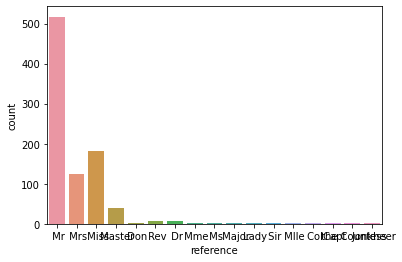

In [ ]:
import seaborn as sns
sns.countplot(last['reference'])

> test dataset

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reference', ylabel='count'>

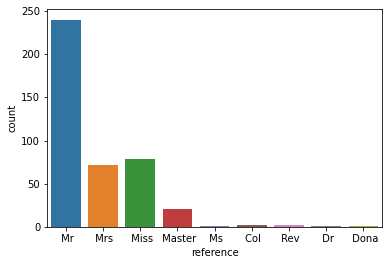

In [ ]:
sns.countplot(last1['reference'])

## 'Mr', 'Miss',' Mrs' 그리고 'Master'를 제외하면 나머지는 소수의 호칭들임을 알 수 있습니다.

그래서 저희는 Mr, Miss, Mrs, Master에 집중해서 값들을 숫자로 변환시켜 줄겁니다.

그러면 자연스럽게 나머지 것들은 그냥 '기타'라는 명목으로 하나로 묶이겠죠.

In [ ]:
train_test['Name'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Name, dtype: int64

## 호칭을 변환해주는 작업 입니다.

Mr는 1로, Mrs 는 2로, Miss는 3으로, Master는 4로 그리고 나머지 기타들은 0으로 묶어주겠습니다.

In [ ]:
train_test['Name']=train_test['Name'].replace(' Mr', 1)
train_test['Name']=train_test['Name'].replace(' Mrs', 2)
train_test['Name']=train_test['Name'].replace(' Miss', 3)
train_test['Name']=train_test['Name'].replace(' Master', 4)
train_test['Name']=train_test['Name'].replace(' Ms', 0)
train_test['Name']=train_test['Name'].replace(' Col', 0)
train_test['Name']=train_test['Name'].replace(' Rev', 0)
train_test['Name']=train_test['Name'].replace(' Dr', 0)
train_test['Name']=train_test['Name'].replace(' Dona', 0)
train_test['Name']=train_test['Name'].replace(' Mlle', 0)
train_test['Name']=train_test['Name'].replace(' Major', 0)
train_test['Name']=train_test['Name'].replace(' Lady', 0)
train_test['Name']=train_test['Name'].replace(' Don', 0)
train_test['Name']=train_test['Name'].replace(' Mme', 0)
train_test['Name']=train_test['Name'].replace(' the Countess', 0)
train_test['Name']=train_test['Name'].replace(' Capt', 0)
train_test['Name']=train_test['Name'].replace(' Sir', 0)
train_test['Name']=train_test['Name'].replace(' Jonkheer', 0)

## 그럼 분포가 어떻게 되는지 보겠습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Name', ylabel='count'>

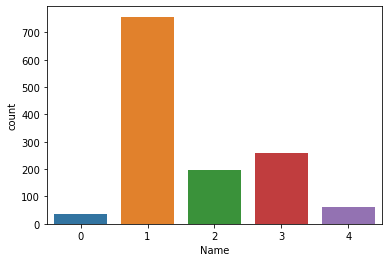

In [ ]:
sns.countplot(train_test['Name'])

In [ ]:
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,male,22.0,1,0,1,7.2500,NaN,S,21171
1,2,1,2,female,38.0,1,0,1,71.2833,C85,C,17599
2,3,3,3,female,26.0,0,0,1,7.9250,NaN,S,3101282
3,4,1,2,female,35.0,1,0,0,53.1000,C123,S,113803
4,5,3,1,male,35.0,0,0,0,8.0500,NaN,S,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,male,NaN,0,0,1,8.0500,NaN,S,3236
1305,1306,1,0,female,39.0,0,0,1,108.9000,C105,C,17758
1306,1307,3,1,male,38.5,0,0,1,7.2500,NaN,S,3101262
1307,1308,3,1,male,NaN,0,0,0,8.0500,NaN,S,359309


## 성별 전처리

성별의 분포

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

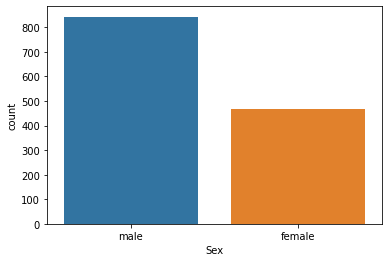

In [ ]:
sns.countplot(train_test['Sex'])

## 남자를 0으로, 여자를 1로 변환해주겠습니다.

In [ ]:
train_test['Sex']=train_test['Sex'].replace('male', 0)
train_test['Sex']=train_test['Sex'].replace('female', 1)
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,22.0,1,0,1,7.2500,NaN,S,21171
1,2,1,2,1,38.0,1,0,1,71.2833,C85,C,17599
2,3,3,3,1,26.0,0,0,1,7.9250,NaN,S,3101282
3,4,1,2,1,35.0,1,0,0,53.1000,C123,S,113803
4,5,3,1,0,35.0,0,0,0,8.0500,NaN,S,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,NaN,0,0,1,8.0500,NaN,S,3236
1305,1306,1,0,1,39.0,0,0,1,108.9000,C105,C,17758
1306,1307,3,1,0,38.5,0,0,1,7.2500,NaN,S,3101262
1307,1308,3,1,0,NaN,0,0,0,8.0500,NaN,S,359309


## Cabin 변수 전처리

일단 이 Cabin에 값들이 어떤지 보겠습니다.

In [ ]:
train_test['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

## Cabin에서 뭔가 찾아볼 단서가 있을까요?

In [ ]:
train_test[train_test['Cabin'] == train_test['Cabin'].value_counts().index[0]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
27,28,1,1,0,19.0,3,2,0,263.0,C23 C25 C27,S,19950
88,89,1,3,1,23.0,3,2,0,263.0,C23 C25 C27,S,19950
341,342,1,3,1,24.0,3,2,0,263.0,C23 C25 C27,S,19950
438,439,1,1,0,64.0,1,4,0,263.0,C23 C25 C27,S,19950
944,945,1,3,1,28.0,3,2,0,263.0,C23 C25 C27,S,19950
960,961,1,2,1,60.0,1,4,0,263.0,C23 C25 C27,S,19950


In [ ]:
train_test[train_test['Cabin'] == train_test['Cabin'].value_counts().index[1]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
10,11,3,3,1,4.0,1,1,1,16.7000,G6,S,9549
205,206,3,3,1,2.0,0,1,0,10.4625,G6,S,347054
251,252,3,2,1,29.0,1,1,0,10.4625,G6,S,347054
394,395,3,2,1,24.0,0,2,1,16.7000,G6,S,9549
1008,1009,3,3,1,1.0,1,1,1,16.7000,G6,S,9549


In [ ]:
train_test[train_test['Cabin'] == train_test['Cabin'].value_counts().index[2]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
311,312,1,3,1,18.0,2,2,1,262.375,B57 B59 B63 B66,C,17608
742,743,1,3,1,21.0,2,2,1,262.375,B57 B59 B63 B66,C,17608
915,916,1,2,1,48.0,1,3,1,262.375,B57 B59 B63 B66,C,17608
955,956,1,4,0,13.0,2,2,1,262.375,B57 B59 B63 B66,C,17608
1033,1034,1,1,0,61.0,1,3,1,262.375,B57 B59 B63 B66,C,17608


## Cabin은 생각보다 많은 단서를 포함하고 있습니다.

예를 들어, 만약 Cabin이 같다면 승객들은 커플이거나 가족일 수도 있겠죠.

그래서 우리는 결측값에 대한 단서를 이러한 점을 통해서 이따가 찾아보겠습니다.

## 일단 간단한 Embarked부터 마저 전처리 해보겠습니다.

In [ ]:
train_test=train_test.reset_index().drop(['index'],axis=1)
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,22.0,1,0,1,7.2500,NaN,S,21171
1,2,1,2,1,38.0,1,0,1,71.2833,C85,C,17599
2,3,3,3,1,26.0,0,0,1,7.9250,NaN,S,3101282
3,4,1,2,1,35.0,1,0,0,53.1000,C123,S,113803
4,5,3,1,0,35.0,0,0,0,8.0500,NaN,S,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,NaN,0,0,1,8.0500,NaN,S,3236
1305,1306,1,0,1,39.0,0,0,1,108.9000,C105,C,17758
1306,1307,3,1,0,38.5,0,0,1,7.2500,NaN,S,3101262
1307,1308,3,1,0,NaN,0,0,0,8.0500,NaN,S,359309


## Embarked의 결측값은 일단 단 두개네요!

In [ ]:
import numpy as np
train_test[train_test['Embarked'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
61,62,1,3,1,38.0,0,0,0,80.0,B28,NaN,113572
829,830,1,2,1,62.0,0,0,0,80.0,B28,NaN,113572


In [ ]:
train_test['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## 저희는 이 두개를 그냥 무시해도 되겠지만, 그래도 정보를 이용해보고자 한번 추론을 해보겠습니다.

군집분석을 이용해볼건데요, Embarked의 군집이 총 세개니까(S, C, Q) 적절한 군집의 수도 3개로 설정해보겠습니다.

## 그 전에 일단 Embarked 값들을 숫자로 변환하겠습니다.

In [ ]:
train_test['Embarked']=train_test['Embarked'].replace('S',0)
train_test['Embarked']=train_test['Embarked'].replace('C',1)
train_test['Embarked']=train_test['Embarked'].replace('Q',2)
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,22.0,1,0,1,7.2500,NaN,0.0,21171
1,2,1,2,1,38.0,1,0,1,71.2833,C85,1.0,17599
2,3,3,3,1,26.0,0,0,1,7.9250,NaN,0.0,3101282
3,4,1,2,1,35.0,1,0,0,53.1000,C123,0.0,113803
4,5,3,1,0,35.0,0,0,0,8.0500,NaN,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,NaN,0,0,1,8.0500,NaN,0.0,3236
1305,1306,1,0,1,39.0,0,0,1,108.9000,C105,1.0,17758
1306,1307,3,1,0,38.5,0,0,1,7.2500,NaN,0.0,3101262
1307,1308,3,1,0,NaN,0,0,0,8.0500,NaN,0.0,359309


## 자 이제 군집분석을 위해 필요한 데이터셋만 모아볼게요.

승객번호와 같은 것들은 날려주도록 합시다.

In [ ]:
imputation_x=train_test[['Pclass','Name','Sex','SibSp','Parch','Ticket','Embarked','Ticket_number']]
imputation_x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Ticket_number
0,3,1,0,1,0,1,0.0,21171
1,1,2,1,1,0,1,1.0,17599
2,3,3,1,0,0,1,0.0,3101282
3,1,2,1,1,0,0,0.0,113803
4,3,1,0,0,0,0,0.0,373450
...,...,...,...,...,...,...,...,...
1304,3,1,0,0,0,1,0.0,3236
1305,1,0,1,0,0,1,1.0,17758
1306,3,1,0,0,0,1,0.0,3101262
1307,3,1,0,0,0,0,0.0,359309


## 일단 먼저, 군집분석 전에 표준화를 해주도록 하겠습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_imputation_x=pd.DataFrame(scaler.fit_transform(imputation_x.drop(['Embarked'],axis=1)))
scale_imputation_x.columns=imputation_x.drop(['Embarked'],axis=1).columns
scale_imputation_x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Ticket_number
0,0.841916,-0.677800,-0.743497,0.481288,-0.445000,1.661774,-0.412343
1,-1.546098,0.346727,1.344995,0.481288,-0.445000,1.661774,-0.417967
2,0.841916,1.371253,1.344995,-0.479087,-0.445000,1.661774,4.437068
3,-1.546098,0.346727,1.344995,0.481288,-0.445000,-0.601766,-0.266501
4,0.841916,-0.677800,-0.743497,-0.479087,-0.445000,-0.601766,0.142295
...,...,...,...,...,...,...,...
1304,0.841916,-0.677800,-0.743497,-0.479087,-0.445000,1.661774,-0.440580
1305,-1.546098,-1.702326,1.344995,-0.479087,-0.445000,1.661774,-0.417717
1306,0.841916,-0.677800,-0.743497,-0.479087,-0.445000,1.661774,4.437037
1307,0.841916,-0.677800,-0.743497,-0.479087,-0.445000,-0.601766,0.120031


## 앞서 말했듯이, 적절한 군집은 3개로 설정할게요.

In [ ]:
k=3

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=k,algorithm='full')
kmean_result=kmeans.fit_transform(scale_imputation_x)
kmean_result

array([[2.07618589, 3.29658205, 5.00430525],
       [3.37755332, 2.51788912, 5.70270729],
       [5.8250739 , 5.21208076, 2.32381638],
       ...,
       [5.02832789, 5.77011975, 1.37662614],
       [1.07691036, 3.0340454 , 4.71591797],
       [3.51885575, 2.53811987, 5.73775979]])

In [ ]:
idx_61=np.argmin(kmean_result[61])
idx_829=np.argmin(kmean_result[829])

## 각 결측값에 해당하는 군집은 1로 나왔습니다.

여기서 주목할것이 있는데, 두 승객의 Embarked가 같은 값으로 나왔습니다.

이는 군집분석이 잘 되었다고 생각해볼 수도 있는게 위의 셀 에서 이 승객에 대한 정보를 보면 티켓 번호나 Cabin의 정보가 같은 것을 봐서 가족? 혹은 연인, 친구 등의 사이임을 알 수 있습니다. 

따라서 같은 군집으로 묶인것을 보면 잘된 것 같네요!

In [ ]:
print(idx_61)
print(idx_829)

1
1


## 두 그룹이 모두 1이 나왔으니

이제 1이라는 그룹에 어떤 Embarked들이 있는지 보겠습니다.

In [ ]:
pd.DataFrame(np.argmin(kmean_result,axis=1))[pd.DataFrame(np.argmin(kmean_result,axis=1))[0] == 0].index

Int64Index([   0,    4,    5,    6,   12,   17,   20,   21,   23,   26,
            ...
            1290, 1292, 1294, 1295, 1296, 1297, 1298, 1304, 1305, 1307],
           dtype='int64', length=741)

## 1 이라는 군집의 대부분은 0이라는 값 즉, S라는 값을 갖고 있네요!

그러니까 두 결측값의 경우 S로 추정해보는 것이 확률적으로 높다고 볼 수 있겠습니다.

따라서 이 값들을 0 (S)으로 치환하겠습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

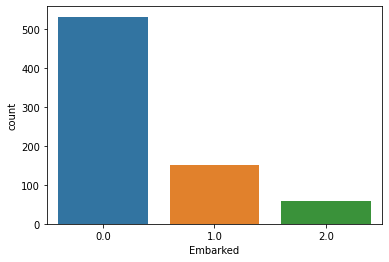

In [ ]:
sns.countplot(train_test['Embarked'].iloc[pd.DataFrame(np.argmin(kmean_result,axis=1))[pd.DataFrame(np.argmin(kmean_result,axis=1))[0] == 0].index])

## 결측값을 0으로 치환하면 되는거니까 이렇게 코딩해볼게요.

치환 후에 남은 결측값은 이제 Age, Fare, Cabin이 있습니다.

In [ ]:
train_test['Embarked']=train_test['Embarked'].fillna(0)
train_test.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
Ticket_number       0
dtype: int64

## 나이 전처리

In [ ]:
train_test['Age']

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

## 나이에 있는 결측값들을 다변량 선형회귀를 이용해서 추정해볼게요.

In [ ]:
from sklearn.linear_model import LinearRegression

age_x = train_test[['Pclass','Name','Sex','SibSp','Parch','Ticket','Embarked','Ticket_number']]

age_y = pd.DataFrame(train_test['Age'])

age_train_y = age_y[age_y['Age'].isnull()==False]
age_test_y = age_y[age_y['Age'].isnull()==True]
age_test_x = age_x.iloc[age_test_y.index]
age_train_x = age_x.iloc[age_train_y.index]
age_model=LinearRegression()
age_model.fit(age_train_x, age_train_y)

LinearRegression()

## 하지만 적당한 방법은 아닌 것 같습니다.

결정계수를 보니까 적절한 방법은 아닌 것 같아요. 왜냐하면 나이는 이산형 변수이기 때문도 있겠지만, 나머지 변수들이 나이를 추정하는데 별 도움이 안되기 때문이죠.



In [ ]:
from sklearn.metrics import r2_score
r2_score(age_train_y, age_model.predict(age_train_x))

0.38161032497841096

## 그러면 이번에 나이변수를 나이대로 구간을 나누어 분류 로써 추정해볼까요?

그러면 23살 -> 20대, 37살 ->30대 등으로 바꾸게 되니, 다분류 작업 즉, softmax 함수를 사용하여 추정해봐야 할 겁니다.

In [ ]:
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,22.0,1,0,1,7.2500,NaN,0.0,21171
1,2,1,2,1,38.0,1,0,1,71.2833,C85,1.0,17599
2,3,3,3,1,26.0,0,0,1,7.9250,NaN,0.0,3101282
3,4,1,2,1,35.0,1,0,0,53.1000,C123,0.0,113803
4,5,3,1,0,35.0,0,0,0,8.0500,NaN,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,NaN,0,0,1,8.0500,NaN,0.0,3236
1305,1306,1,0,1,39.0,0,0,1,108.9000,C105,1.0,17758
1306,1307,3,1,0,38.5,0,0,1,7.2500,NaN,0.0,3101262
1307,1308,3,1,0,NaN,0,0,0,8.0500,NaN,0.0,359309


## 나이 변수의 분포

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

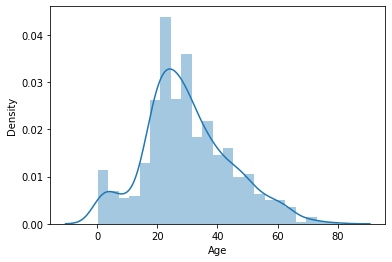

In [ ]:
sns.distplot(train_test['Age'])

## 제일 어린 나이, 많은 나이

In [ ]:
print(train_test['Age'].min())
print(train_test['Age'].max())

0.17
80.0


이 작업은 나이를 나이대로 분류해주는 작업입니다.

In [ ]:
age=pd.DataFrame()

for i in train_test['Age']:
  i = str(i)[0]
  age=age.append([i])
age

,0
0,2
0,3
0,2
0,3
0,3
...,...
0,n
0,3
0,3
0,n


In [ ]:
age=age.reset_index().drop(['index'],axis=1)
age.columns=['Age']
age

,Age
0,2
1,3
2,2
3,3
4,3
...,...
1304,n
1305,3
1306,3
1307,n


## 로지스틱 모형으로 결측값의 나이대를 추정하는 작업 입니다.

하지만 이번에도 결정계수를 보니 적절한 방법은 아닌 것 같네요.

In [ ]:
age=age.replace('n',np.NaN)
age_x = train_test[['Pclass','Name','Sex','SibSp','Parch','Ticket','Embarked','Ticket_number']]
scaler=StandardScaler()
age_xx=pd.DataFrame(scaler.fit_transform(age_x))
age_xx.columns=age_x.columns



age_y = pd.DataFrame(age['Age'])

age_train_y = age_y[age_y['Age'].isnull()==False]
age_test_y = age_y[age_y['Age'].isnull()==True]
age_test_x = age_xx.iloc[age_test_y.index]
age_train_x = age_xx.iloc[age_train_y.index]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(age_train_x, age_train_y)
accuracy_score(age_train_y, model.predict(age_train_x))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.372848948374761

## 로지스틱도 적절한 방법은 아닙니다.

그러면 이제, 나이를 평균이나 최대값등 대체해볼 수 있겠습니다.

하지만, 저는 그렇게 하지 않을 겁니다.

오히려 결측값들을 결측값 그 자체의 데이터로 보겠습니다.

그러니까, 저희가 나중에 딥러닝한테 데이터를 넣어줄 때,

"이 승객의 경우 나이는 잘 모르겠는데?"로 넣어주겠다는 말 입니다.

그게 어떻게 되지?? 하실 수 있겠지만, 테스트 데이터셋에도 역시 나이에 대한 결측값이 있기 때문에

차라리 딥러닝이 나이에 대한 결측값을 학습하도록 만드는 것도 한 가지 방법이 될 수 있는 겁니다.

즉, 딥러닝을 강하게 키워라!

다시 시작해 볼게요.

## 나이에 대한 결측값을 모르는 값으로 대체해 주기


이제 Age 컬럼에서 -1은 모르는 값을 나타내는 것이 됩니다.

In [ ]:
train_test['Age']=age['Age']
train_test['Age']=train_test['Age'].fillna(-1)
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,2,1,0,1,7.2500,NaN,0.0,21171
1,2,1,2,1,3,1,0,1,71.2833,C85,1.0,17599
2,3,3,3,1,2,0,0,1,7.9250,NaN,0.0,3101282
3,4,1,2,1,3,1,0,0,53.1000,C123,0.0,113803
4,5,3,1,0,3,0,0,0,8.0500,NaN,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,-1,0,0,1,8.0500,NaN,0.0,3236
1305,1306,1,0,1,3,0,0,1,108.9000,C105,1.0,17758
1306,1307,3,1,0,3,0,0,1,7.2500,NaN,0.0,3101262
1307,1308,3,1,0,-1,0,0,0,8.0500,NaN,0.0,359309


## 요금 전처리

Fare 분포

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

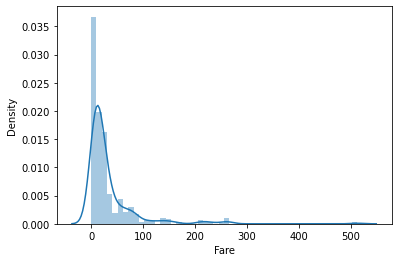

In [ ]:
sns.distplot(train_test['Fare'])

## Ticket number로 단서를 찾아볼 수 있을까요?

티켓 정보가 같다면 요금도 비슷할 수 있을테니,

먼저 요금 결측값을 가진 티켓 번호를 찾고, 그걸 기반으로 다시 같은 티켓번호를 가진 사람들의 요금을 살펴봅시다.

In [ ]:
train_test[train_test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
1043,1044,3,1,0,6,0,0,0,NaN,NaN,0.0,3701


In [ ]:
train_test[train_test['Ticket_number'] == '3701']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
1043,1044,3,1,0,6,0,0,0,NaN,NaN,0.0,3701


이 경우에는 요금에 대한 정보를 발견하기가 어렵네요..

따라서 그냥 같은 좌석 클래스, embarked에 해당하는 값들의 평균으로 대체해줍시다.

In [ ]:
fare_imputation=train_test[(train_test['Pclass'] == 3) & (train_test['Embarked'] == 0)]['Fare'].mean()
fare_imputation

14.435422064777338

## 요금 결측값 대체

In [ ]:
train_test['Fare']=train_test['Fare'].fillna(fare_imputation)

## Cabin 전처리

이제 마저 Cabin을 전처리 해줄건데 밑의 코드 셀을 보시면 Ticket과 연관이 높은 것을 알 수 있습니다.

In [ ]:
train_test['Ticket_number']

0         21171
1         17599
2       3101282
3        113803
4        373450
         ...   
1304       3236
1305      17758
1306    3101262
1307     359309
1308       2668
Name: Ticket_number, Length: 1309, dtype: object

In [ ]:
train_test[train_test['Ticket_number'] == '21171']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,2,1,0,1,7.25,NaN,0.0,21171


같은 티켓은 같은 Cabin임을 보여주기도 하죠

In [ ]:
train_test[train_test['Ticket_number'] == '17599']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
1,2,1,2,1,3,1,0,1,71.2833,C85,1.0,17599
1125,1126,1,1,0,3,1,0,1,71.2833,C85,1.0,17599


In [ ]:
train_test[train_test['Ticket_number'] == '3101282']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
2,3,3,3,1,2,0,0,1,7.925,NaN,0.0,3101282


In [ ]:
train_test[train_test['Ticket_number'] == '113803']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
3,4,1,2,1,3,1,0,0,53.1,C123,0.0,113803
137,138,1,1,0,3,1,0,0,53.1,C123,0.0,113803


## 같은 티켓은 요금, cabin, embarked가 똑같음을 보여줍니다.


In [ ]:
train_test[train_test['Cabin'].isnull()== True]['Ticket_number']

0         21171
2       3101282
4        373450
5        330877
7        349909
         ...   
1303     347086
1304       3236
1306    3101262
1307     359309
1308       2668
Name: Ticket_number, Length: 1014, dtype: object

## 그러면 티켓과 티켓 넘버를 그룹핑 해줌으로써 단서를 더 찾아보도록 할게요.

In [ ]:
for i in pd.DataFrame(train_test.groupby(by=['Ticket','Ticket_number']))[1]:
  print(i)

     PassengerId  Pclass  Name  Sex Age  SibSp  Parch  Ticket  Fare Cabin  \
179          180       3     1    0   3      0      0       0   0.0   NaN   
271          272       3     1    0   2      0      0       0   0.0   NaN   
302          303       3     1    0   1      0      0       0   0.0   NaN   
597          598       3     1    0   4      0      0       0   0.0   NaN   

     Embarked Ticket_number  
179       0.0             0  
271       0.0             0  
302       0.0             0  
597       0.0             0  
     PassengerId  Pclass  Name  Sex Age  SibSp  Parch  Ticket  Fare Cabin  \
257          258       1     3    1   3      0      0       0  86.5   B77   
504          505       1     3    1   1      0      0       0  86.5   B79   
759          760       1     0    1   3      0      0       0  86.5   B77   

     Embarked Ticket_number  
257       0.0        110152  
504       0.0        110152  
759       0.0        110152  
     PassengerId  Pclass  Name  Sex

## 하지만, 많은 경우에 단서를 찾기가 어렵습니다.

따라서 이 경우에도 결측값은 -1로 코딩하고, 그 자체의 데이터로 써먹어보겠습니다.

In [ ]:
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,2,1,0,1,7.2500,NaN,0.0,21171
1,2,1,2,1,3,1,0,1,71.2833,C85,1.0,17599
2,3,3,3,1,2,0,0,1,7.9250,NaN,0.0,3101282
3,4,1,2,1,3,1,0,0,53.1000,C123,0.0,113803
4,5,3,1,0,3,0,0,0,8.0500,NaN,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,-1,0,0,1,8.0500,NaN,0.0,3236
1305,1306,1,0,1,3,0,0,1,108.9000,C105,1.0,17758
1306,1307,3,1,0,3,0,0,1,7.2500,NaN,0.0,3101262
1307,1308,3,1,0,-1,0,0,0,8.0500,NaN,0.0,359309


## Cabin의 value case

> A passenger has a couple of seats

> Unknown seat type

> Unknown seat number

따라서 저희는 값을 모른다면 -1로, 값을 안다면 앞의 이니셜만 따오도록 하겠습니다.

예를 들어, C274라면 C만 따오게 되는거죠.

In [ ]:
for i in train_test['Cabin']:
  i = str(i).split(' ')
  print(i)

['nan']
['C85']
['nan']
['C123']
['nan']
['nan']
['E46']
['nan']
['nan']
['nan']
['G6']
['C103']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['D56']
['nan']
['A6']
['nan']
['nan']
['nan']
['C23', 'C25', 'C27']
['nan']
['nan']
['nan']
['B78']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['D33']
['nan']
['B30']
['C52']
['nan']
['nan']
['nan']
['nan']
['nan']
['B28']
['C83']
['nan']
['nan']
['nan']
['F33']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['F', 'G73']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['C23', 'C25', 'C27']
['nan']
['nan']
['nan']
['E31']
['nan']
['nan']
['nan']
['A5']
['D10', 'D12']
['nan']
['nan']
['nan']
['nan']
['D26']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['C110']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['B58', 'B60']
[

## 결측값과 좌석 이니셜 데이터 모아주기

In [ ]:
cabin=pd.DataFrame()
train_test['Cabin']=train_test['Cabin'].fillna(-1)
for i in train_test['Cabin']:
  if i != -1:
    i = str(i).split(' ')
    cabin=cabin.append([i[0][0]])
  else:
    cabin=cabin.append([i])
cabin

,0
0,-1
0,C
0,-1
0,C
0,-1
...,...
0,-1
0,C
0,-1
0,-1


## Cabin 값 분포 살펴보기

역시 결측값이 가장 많은 것을 알 수 있습니다.

In [ ]:
cabin.value_counts()

-1    1014
C       94
B       65
D       46
E       41
A       22
F       21
G        5
T        1
dtype: int64

## Cabin 데이터를 숫자로 변환하기

그리고 나머지 데이터를 숫자로 변환해줄게요!


In [ ]:
cabin=cabin.replace('C', 0)
cabin=cabin.replace('B', 1)
cabin=cabin.replace('D', 2)
cabin=cabin.replace('E', 3)
cabin=cabin.replace('A', 4)
cabin=cabin.replace('F', 5)
cabin=cabin.replace('G', 6)
cabin=cabin.replace('T', 7)
cabin

,0
0,-1
0,0
0,-1
0,0
0,-1
...,...
0,-1
0,0
0,-1
0,-1


In [ ]:
cabin.value_counts()

-1    1014
 0      94
 1      65
 2      46
 3      41
 4      22
 5      21
 6       5
 7       1
dtype: int64

In [ ]:
cabin=cabin.reset_index().drop(['index'],axis=1)
cabin.columns=['Cabin']
cabin

,Cabin
0,-1
1,0
2,-1
3,0
4,-1
...,...
1304,-1
1305,0
1306,-1
1307,-1


## 이제 전처리가 다된 Cabin을 원래 데이터에 넣어주겠습니다.

In [ ]:
train_test['Cabin'] = cabin['Cabin']
train_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,1,3,1,0,2,1,0,1,7.2500,-1,0.0,21171
1,2,1,2,1,3,1,0,1,71.2833,0,1.0,17599
2,3,3,3,1,2,0,0,1,7.9250,-1,0.0,3101282
3,4,1,2,1,3,1,0,0,53.1000,0,0.0,113803
4,5,3,1,0,3,0,0,0,8.0500,-1,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,-1,0,0,1,8.0500,-1,0.0,3236
1305,1306,1,0,1,3,0,0,1,108.9000,0,1.0,17758
1306,1307,3,1,0,3,0,0,1,7.2500,-1,0.0,3101262
1307,1308,3,1,0,-1,0,0,0,8.0500,-1,0.0,359309


## 자! 이제 전처리가 모두 끝났습니다.

In [ ]:
train_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Ticket_number    0
dtype: int64

## 이제 데이터를 딥러닝에 훈련시키기 위해서 정규화를 해주고, 훈련, 검증, 테스트 용으로 나눠주겠습니다.

그리고 승객ID는 훈련에 필요없으니 제거해주겠습니다.

## 훈련과 테스트 데이터셋 나눠주기

앞서 말했듯이, 891번째 부터가 테스트 데이터의 시작입니다.

참고로, 파이썬은 제로베이스 언어기 때문에 0을 시작으로, 그리고 끝에 번호는 세지 않습니다.

따라서 아래와 같이 코딩하는 것이 맞습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scale_data = pd.DataFrame(scaler.fit_transform(train_test.drop(['PassengerId'],axis=1)))
scale_data.columns=[train_test.drop(['PassengerId'],axis=1).columns]
train_data=scale_data.iloc[:891]
test_data=scale_data.iloc[891:]

In [ ]:
train_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,0.841916,-0.677800,-0.743497,-0.039247,0.481288,-0.445000,1.661774,-0.503291,-0.441136,-0.603436,-0.412343
1,-1.546098,0.346727,1.344995,0.440887,0.481288,-0.445000,1.661774,0.734744,0.276189,0.927373,-0.417967
2,0.841916,1.371253,1.344995,-0.039247,-0.479087,-0.445000,1.661774,-0.490240,-0.441136,-0.603436,4.437068
3,-1.546098,0.346727,1.344995,0.440887,0.481288,-0.445000,-0.601766,0.383184,0.276189,-0.603436,-0.266501
4,0.841916,-0.677800,-0.743497,0.440887,-0.479087,-0.445000,-0.601766,-0.487823,-0.441136,-0.603436,0.142295
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.352091,-1.702326,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.392119,-0.441136,-0.603436,-0.112627
887,-1.546098,1.371253,1.344995,-0.519381,-0.479087,-0.445000,-0.601766,-0.063437,0.993514,-0.603436,-0.269256
888,0.841916,1.371253,1.344995,-1.479649,0.481288,1.866526,1.661774,-0.190076,-0.441136,-0.603436,-0.435273
889,-1.546098,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.063437,0.276189,0.927373,-0.270333


In [ ]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
891,0.841916,-0.677800,-0.743497,0.440887,-0.479087,-0.445000,-0.601766,-0.492092,-0.441136,2.458182,0.075320
892,0.841916,0.346727,1.344995,0.921021,0.481288,-0.445000,-0.601766,-0.508124,-0.441136,-0.603436,0.126270
893,-0.352091,-0.677800,-0.743497,1.881289,-0.479087,-0.445000,-0.601766,-0.456164,-0.441136,2.458182,-0.067378
894,0.841916,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.475981,-0.441136,-0.603436,0.050512
895,0.841916,0.346727,1.344995,-0.039247,0.481288,0.710763,-0.601766,-0.405895,-0.441136,-0.603436,4.437094
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.841916,-0.677800,-0.743497,-1.479649,-0.479087,-0.445000,1.661774,-0.487823,-0.441136,-0.603436,-0.440580
1305,-1.546098,-1.702326,1.344995,0.440887,-0.479087,-0.445000,1.661774,1.462034,0.276189,0.927373,-0.417717
1306,0.841916,-0.677800,-0.743497,0.440887,-0.479087,-0.445000,1.661774,-0.503291,-0.441136,-0.603436,4.437037
1307,0.841916,-0.677800,-0.743497,-1.479649,-0.479087,-0.445000,-0.601766,-0.487823,-0.441136,-0.603436,0.120031


## 자, 이제 훈련 데이터 셋을 훈련, 검증용으로 다시 나눠보겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y ,val_y = train_test_split(train_data, train_y, test_size=0.4,random_state=2021)

train_x=train_x.reset_index().drop(['index'],axis=1)
val_x=val_x.reset_index().drop(['index'],axis=1)
test_data=test_data.reset_index().drop(['index'],axis=1)

train_y=pd.DataFrame(train_y).reset_index().drop(['index'],axis=1)
val_y=pd.DataFrame(val_y).reset_index().drop(['index'],axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
train_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,0.841916,-0.677800,-0.743497,0.440887,-0.479087,-0.445000,1.661774,-0.505708,-0.441136,-0.603436,4.437054
1,-1.546098,-0.677800,-0.743497,0.921021,-0.479087,-0.445000,-0.601766,0.042901,5.297463,-0.603436,-0.266531
2,-0.352091,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.392119,-0.441136,-0.603436,-0.060947
3,0.841916,-0.677800,-0.743497,-1.479649,0.481288,-0.445000,-0.601766,-0.176542,-0.441136,2.458182,0.138611
4,-0.352091,-0.677800,-0.743497,0.440887,-0.479087,-0.445000,1.661774,-0.394536,1.710839,0.927373,-0.442270
...,...,...,...,...,...,...,...,...,...,...,...
529,-1.546098,-0.677800,-0.743497,0.921021,0.481288,-0.445000,-0.601766,0.372631,1.710839,-0.603436,-0.427171
530,0.841916,1.371253,1.344995,-1.479649,0.481288,0.710763,-0.601766,-0.211183,3.862813,0.927373,-0.441475
531,0.841916,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.503693,-0.441136,0.927373,-0.441429
532,-1.546098,1.371253,1.344995,-0.039247,2.402037,1.866526,-0.601766,4.441439,0.276189,-0.603436,-0.414265


In [ ]:
val_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number
0,0.841916,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,1.661774,-0.507158,-0.441136,-0.603436,4.437114
1,0.841916,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.453103,-0.441136,-0.603436,-0.433813
2,-0.352091,-0.677800,-0.743497,-0.039247,-0.479087,-0.445000,-0.601766,-0.392119,-0.441136,-0.603436,-0.076179
3,0.841916,2.395779,-0.743497,-0.519381,2.402037,1.866526,-0.601766,-0.104039,-0.441136,-0.603436,0.100790
4,0.841916,0.346727,1.344995,0.921021,0.481288,3.022288,1.661774,0.021150,-0.441136,-0.603436,-0.435271
...,...,...,...,...,...,...,...,...,...,...,...
352,-0.352091,0.346727,1.344995,-0.039247,0.481288,-0.445000,-0.601766,-0.140774,-0.441136,-0.603436,-0.441068
353,-1.546098,2.395779,-0.743497,0.921021,-0.479087,1.866526,-0.601766,0.939203,3.145488,-0.603436,-0.392715
354,0.841916,-0.677800,-0.743497,-0.519381,-0.479087,-0.445000,1.661774,-0.487823,-0.441136,-0.603436,-0.440102
355,0.841916,-0.677800,-0.743497,-0.039247,0.481288,-0.445000,1.661774,-0.503291,-0.441136,-0.603436,-0.412343


## 이제 정말 준비가 다 끝났습니다.

예측을 시작해볼까요?

# 생존자 예측을 위한 딥런이 모델 구축

In [ ]:
# Load tensorflow for DL.
import tensorflow as tf


# Set your model with Sequential
model=tf.keras.models.Sequential(
    # Flatten is used to input your train data.
    [tf.keras.layers.Flatten(input_shape = [train_x.shape[1]]),
     # Stack your hidden layers with some neurons.
     # If you don't know what you should use the activation function, ReLU function will be helpful.
     # Practice your deep learning by changing some neurons in each layer and try to improve your score iterately.
     tf.keras.layers.Dense(500,activation='selu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     # Dropout is used to regularize and prevent the model from overfitting.
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1500, activation='relu'),
     tf.keras.layers.Dropout(0.15),
     # This analysis is for classification. So, you have to use the number of neuron as 1 in output layer.
     # In this case, the activation function in output layer will be more powerful to use sigmoid than relu.
     tf.keras.layers.Dense(1,activation='sigmoid')]
)


# # Set your learning schedule for get global optimum point.
# lr = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=2e-3,
#     decay_steps=10000,
#     decay_rate=0.95
# )

# Set your optimizer as Adagrad or SGD or extra...
opt = tf.keras.optimizers.Adam(learning_rate = 0.002)

# Compile your model with prepared optimizer, loss function for classification and metrics for monitoring.
model.compile(optimizer = opt, loss='binary_crossentropy', metrics = ['accuracy'])

# Fit your train dataset and validation dataset.
# You can practice this model by changing some hyper parameters such as epochs, batch_size, and so on into another values.
# EarlyStopping is used for preventing the training from overfitting.
# patience is related to your epochs and save your best model by setting restore_best_weights.
model.fit(train_x, train_y, batch_size = 5, epochs=200, verbose=2, validation_split=0.2, workers=3, validation_batch_size = 5, 
          callbacks = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience=200 * 0.1, verbose=2, restore_best_weights=True))

# validate your model performance
# It will be represented loss value and accuracy value, repectively.
model.evaluate(val_x, val_y)

2021-12-21 08:28:59.873837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 08:28:59.970504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 08:28:59.971271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 08:28:59.972407: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/200
86/86 - 2s - loss: 0.7645 - accuracy: 0.7564 - val_loss: 0.6802 - val_accuracy: 0.5234
Epoch 2/200
86/86 - 0s - loss: 0.5441 - accuracy: 0.7658 - val_loss: 0.5482 - val_accuracy: 0.8318
Epoch 3/200
86/86 - 0s - loss: 0.5745 - accuracy: 0.7939 - val_loss: 0.6897 - val_accuracy: 0.5888
Epoch 4/200
86/86 - 0s - loss: 0.5479 - accuracy: 0.7822 - val_loss: 0.7645 - val_accuracy: 0.6262
Epoch 5/200
86/86 - 0s - loss: 0.7030 - accuracy: 0.7986 - val_loss: 0.6089 - val_accuracy: 0.7570
Epoch 6/200
86/86 - 0s - loss: 0.5939 - accuracy: 0.8033 - val_loss: 0.5649 - val_accuracy: 0.7196
Epoch 7/200
86/86 - 0s - loss: 0.5445 - accuracy: 0.7916 - val_loss: 0.6446 - val_accuracy: 0.7290
Epoch 8/200
86/86 - 0s - loss: 0.4615 - accuracy: 0.8173 - val_loss: 0.5590 - val_accuracy: 0.7850
Epoch 9/200
86/86 - 0s - loss: 0.4434 - accuracy: 0.8478 - val_loss: 0.4842 - val_accuracy: 0.7757
Epoch 10/200
86/86 - 0s - loss: 0.4665 - accuracy: 0.8384 - val_loss: 0.5923 - val_accuracy: 0.7944
Epoch 11/

[0.510883092880249, 0.7871148586273193]

# 예측 결과 제출하기

In [ ]:
# Load the submission form.
submission=pd.read_csv('../input/titanic/gender_submission.csv')

# We will input our prediction into this data frame.
prediction=pd.DataFrame()

# DL will show the probability about classification. So, we can classify the survival class or no along with the probability (your prediction)
for i in model.predict(test_data):
    # If the probability is greater than 0.5, this observation is regared as survived.
    # In this case, the decision boundary is 0.5.
  if i >=0.5:
    i=1
    prediction=prediction.append([i])
    # If it is not that, this observation is regared as dead.
  else:
    i=0
    prediction=prediction.append([i])
prediction=prediction.reset_index().drop(['index'],axis=1)
prediction.columns=['Survived']


# Finish your submission.
submission['Survived'] = prediction['Survived']

# Submit your result.
submission.to_csv('submission.csv',index=False)

# 따라와 주셔서 감사합니다.

이 노트북은 초심자를 위한 것이라고는 했지만, 사실 어느정도 파이썬에 익숙하고 딥러닝이나 pandas와 라이브러리에 익숙한 사람에게 더 도움이 될 것입니다.

더욱 정교하고, 자세하게 적어놓지 못해 죄송합니다.

하지만 이 내용이 이 글을 읽어주는 당신에게 좋은 정보가 되었으면 합니다.

감사합니다.